Partie 1: Mécanique céleste

In [1]:
import numpy as np
from astropy.constants import G, M_earth, M_sun 
import matplotlib.pyplot as plt
import de421
from astropy.time import Time
from jplephem import Ephemeris
from numpy import empty, arange, exp, real, imag, pi
from numpy.fft import rfft, irfft, ifft, fft
from math import exp
import cmath
import pandas as pd
from scipy.constants import pi, hbar
# Visual Python: Logic > code
import plotly
import plotly.express as px
import scipy


C:\Users\Danick Bisson\AppData\Local\Temp\ipykernel_9300\3025960073.py:11: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


a) Implémentation de la méthode de Verlet 

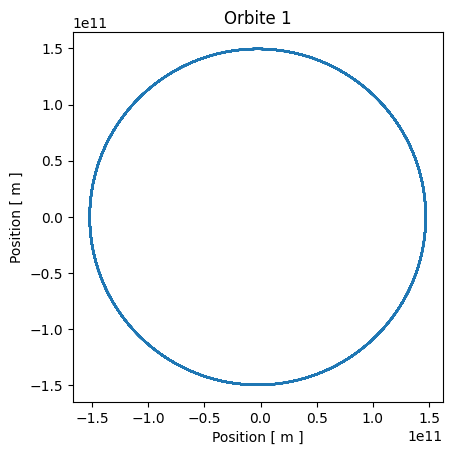

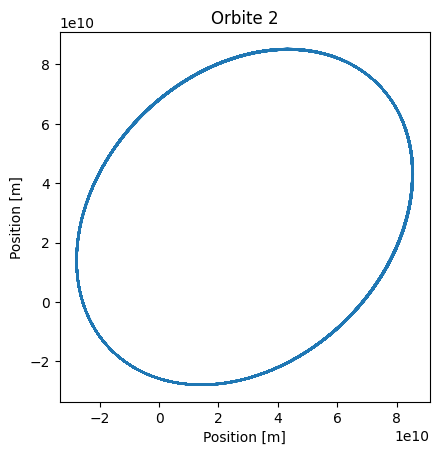

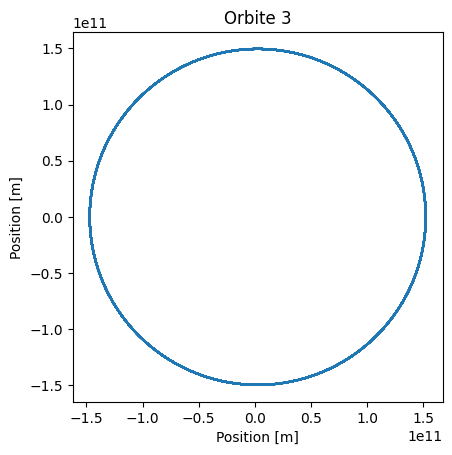

In [2]:
r_0 = 1.4710e11 # m
v_0 = 3.0287e4 #m/s

def f(r):
    return(-G.value * M_sun.value * r/np.linalg.norm(r)**3)
    
def verlet(r, v_1, h, maxx):
    
    vx=[v_1[0]]
    vy=[v_1[1]]
    x = [r[0]]
    y =[r[1]]
    
    for i in range(1, maxx):
        r = r + h * v_1
        k = h * f(r)
        v_2 = v_1 + 0.5 * k 
        v_1 = v_1 + k
        vx.append(v_2[0])
        vy.append(v_2[1])
        x.append(r[0])
        y.append(r[1])
             
    
    return(x,y,vx,vy)
    
    #Représentation de différents orbites (les conditions initiales varient)
    
maxx = 250000 # nombres d'itérations maximales
h = 3600 
r = np.array([r_0, 0])
v_1 =  np.array([0,v_0]) + 0.5 * h * f(r)
x, y, vx, vy = verlet(r, v_1, h, maxx) # le pas correspond a un incrément temporel de 1h en secondes 
plt.figure()
plt.plot(x, y)
plt.gca().set_aspect("equal")
plt.title("Orbite 1")
plt.ylabel("Position [ m ]")
plt.xlabel("Position [ m ]")
plt.show()
    
    
r = np.array([r_0/2, r_0/2])
v_1 =  np.array([-v_0/2,v_0/2]) + 0.5 * h * f(r)
xverlet, yverlet, vxverlet,vyverlet = verlet(r, v_1, h, maxx)
plt.figure()
plt.plot(xverlet, yverlet)
plt.gca().set_aspect("equal")
plt.title("Orbite 2")
plt.ylabel("Position [m]")
plt.xlabel("Position [m]")
plt.show()

r = np.array([-r_0, 0])
v_1 =  np.array([0,-v_0]) + 0.5 * h * f(r)
xverlet, yverlet, vxverlet,vyverlet = verlet(r, v_1, h, maxx)
plt.figure()
plt.plot(xverlet, yverlet)
plt.gca().set_aspect("equal")
plt.title("Orbite 3")
plt.ylabel("Position [m]")
plt.xlabel("Position [m]")
plt.show()

B) Méthode de Verlet en calculant l'énergie

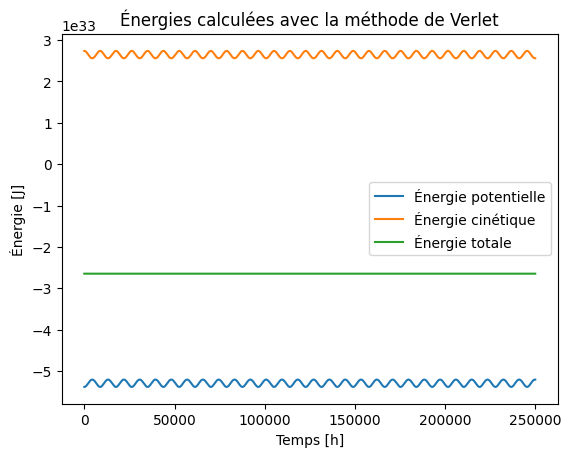

In [3]:
def verletenergie(r, v_1, h, maxx):
    U = [-G.value*M_sun.value*M_earth.value/np.linalg.norm(r)]
    E_k = [1/2*M_earth.value*np.linalg.norm(v_1)**2]
    E_tot = [U[0]+E_k[0]]
    
    vx=[v_1[0]]
    vy=[v_1[1]]
    x = [r[0]]
    y =[r[1]]
    
    for i in range(1, maxx):
        r = r + h * v_1
        k = h * f(r)
        v_2 = v_1 + 0.5 * k 
        v_1 = v_1 + k
        vx.append(v_2[0])
        vy.append(v_2[1])
        x.append(r[0])
        y.append(r[1])
    
        E_k.append(1/2*M_earth.value*np.linalg.norm(v_2)**2)
        U.append(-G.value*M_sun.value*M_earth.value/np.linalg.norm(r))
        E_tot.append(U[i] + E_k[i])
    
    return(E_k,U, E_tot)
    
    
    
r = np.array([r_0, 0])
v_1 =  np.array([0,v_0]) + 0.5 * h * f(r)
E_k, U, E_totVerlet = verletenergie(r, v_1, 3600, maxx)
    
    
plt.figure()
plt.plot(range(maxx),U, label = "Énergie potentielle")
plt.plot(range(maxx), E_k, label = "Énergie cinétique")
plt.plot(range(maxx), E_totVerlet, label = "Énergie totale")
plt.title("Énergies calculées avec la méthode de Verlet")
plt.ylabel("Énergie [J]")
plt.xlabel("Temps [h]")
plt.legend()
plt.show()

La méthode de Verlet est simplectique, ce qui veut dire que l'énergie est conservée. Cela est bien visible sur le graphique ci-dessus, ou l'énergie cinétique et potentielle demeure périodique sur plusieurs révolutions de la terre. 

C) Méthode d'Euler, RK2, RK4

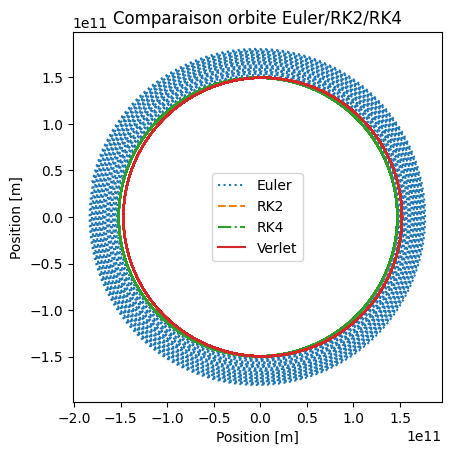

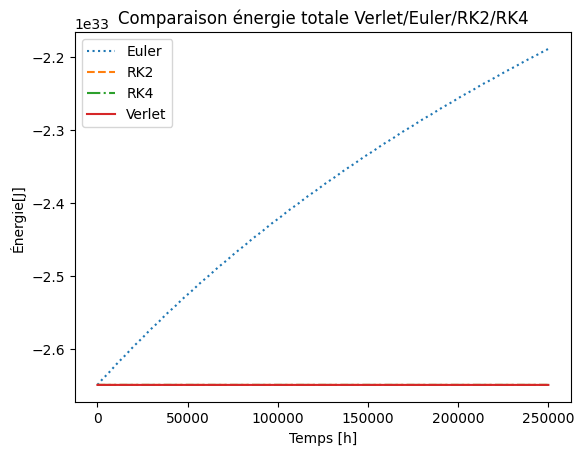

In [4]:
def f2(r):
    x, y, vx, vy = r

    Dx = vx
    Dy = vy

    R = np.sqrt(x**2+y**2)
    Dvx = -G.value*M_sun.value*x/R**3
    Dvy=  - G.value*M_sun.value*y/R**3

    return(np.array([Dx, Dy, Dvx, Dvy]))

def Euler(a, b, h, r_0, v_0): 
    tpoints = np.arange(a,b,h)
    x = []
    y = []
    vx = []
    vy = [] 
    E_tot = []
    r = np.array([r_0, 0, 0, v_0]) 

    j = 0
    for t in tpoints: 
        x.append(r[0])
        y.append(r[1])
        vx.append(r[2])
        vy.append(r[3])
        E_tot.append(-G.value*M_sun.value*M_earth.value/(np.sqrt(x[j]**2+y[j]**2)) + 1/2*M_earth.value*(np.sqrt(vx[j]**2+vy[j]**2))**2)
        r += h * f2(r)
        j +=1

        

    return(tpoints, x, y, vx, vy,  E_tot) 

def RK2(a, b, h, r_0, v_0): 
    tpoints = np.arange(a,b,h)
    x = []
    y = []
    vx = []
    vy = [] 
    E_tot = []
    r = np.array([r_0, 0, 0, v_0]) 

    j = 0
    for t in tpoints: 
        x.append(r[0])
        y.append(r[1])
        vx.append(r[2])
        vy.append(r[3])

        E_tot.append(-G.value*M_sun.value*M_earth.value/(np.sqrt(x[j]**2+y[j]**2)) + 1/2*M_earth.value*(np.sqrt(vx[j]**2+vy[j]**2))**2)
        j += 1
        k1 = h * f2(r)
        k2 = h * f2(r+0.5*k1)
        r += k2

    return(tpoints,x, y, vx, vy,  E_tot)

def RK4(a, b, h, r_0, v_0): 
    tpoints = np.arange(a,b,h)
    x = []
    y = []
    vx = []
    vy = [] 
    E_tot = []
    r = np.array([r_0, 0, 0, v_0]) 

    j = 0
    for t in tpoints: 
        x.append(r[0])
        y.append(r[1])
        vx.append(r[2])
        vy.append(r[3])

        E_tot.append(-G.value*M_sun.value*M_earth.value/(np.sqrt(x[j]**2+y[j]**2)) + 1/2*M_earth.value*(np.sqrt(vx[j]**2+vy[j]**2))**2)
        j += 1
        k1 = h * f2(r)
        k2 = h * f2(r+0.5*k1)
        k3 = h * f2(r+0.5*k2)
        k4 = h*f2(r+k3)
        r += (k1+2*k2+2*k3+k4)/6

    return(tpoints,x, y, vx, vy,  E_tot)


tRK2, xRK2,yRK2, vxRK2, vyRK2, ERK2 = RK2(0, 900000000, 3600, r_0, v_0)
tRK4, xRK4,yRK4, vxRK4, vyRK4, ERK4 = RK4(0, 900000000, 3600, r_0, v_0)
tEuler, xEuler,yEuler, vxEuler,vyEuler, EEuler = Euler(0, 900000000, 3600, r_0, v_0)
temps = [x/3600 for x in tRK4]

plt.figure()
plt.title("Comparaison orbite Euler/RK2/RK4")
plt.ylabel("Position [m]")
plt.xlabel("Position [m]")
plt.plot(xEuler,yEuler, label = "Euler", linestyle = "dotted")
plt.plot(xRK2,yRK2, label = "RK2", linestyle = "dashed")
plt.plot(xRK4,yRK4, label = "RK4", linestyle = "dashdot")
plt.plot(xverlet, yverlet, label="Verlet")
plt.gca().set_aspect("equal")
plt.legend()
plt.show()


plt.figure()
plt.title("Comparaison énergie totale Verlet/Euler/RK2/RK4")
plt.ylabel("Énergie[J]")
plt.xlabel("Temps [h]")
plt.plot(temps,EEuler, label = "Euler", linestyle = "dotted")
plt.plot(temps,ERK2, label = "RK2", linestyle = "dashed")
plt.plot(temps,ERK4, label = "RK4", linestyle = "dashdot")
plt.plot(range(maxx),E_totVerlet, label = "Verlet")
plt.legend()
plt.show()

On peut constater qu'Euler ne conserve pas l'énergie à travers les révolutions, et est donc non simplectic. Tel qu'attendu, elle est celle possédant la plus faible stabilité numérique, divergeant dès le début. Pour RK2, la son caractère se voit mieux en la comparant seulement avec Verlet et RK4: 

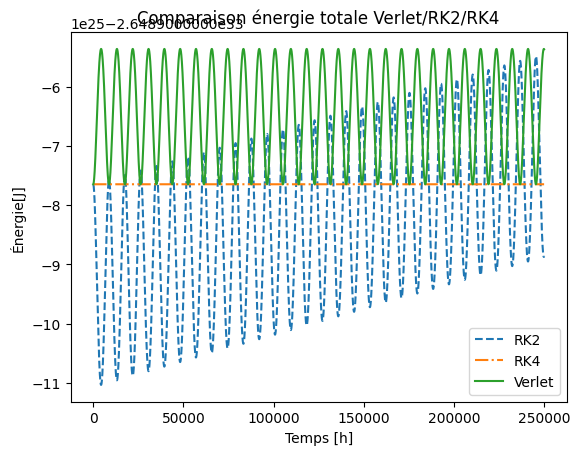

In [5]:
plt.figure()
plt.title("Comparaison énergie totale Verlet/RK2/RK4")
plt.ylabel("Énergie[J]")
plt.xlabel("Temps [h]")
plt.plot(temps,ERK2, label = "RK2", linestyle = "dashed")
plt.plot(temps,ERK4, label = "RK4", linestyle = "dashdot")
plt.plot(range(1, maxx),E_totVerlet[1:], label = "Verlet")
plt.legend()
plt.show()

Pour RK4, qui possède une bien meilleur stabilité que RK2, il est nécéssaire de l'analyser seul: 

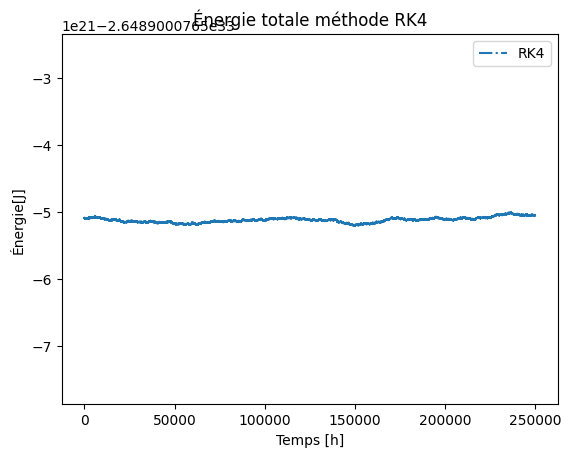

In [6]:
plt.figure()
plt.title("Énergie totale méthode RK4")
plt.ylabel("Énergie[J]")
plt.xlabel("Temps [h]")
plt.plot(temps,ERK4, label = "RK4", linestyle = "dashdot")
plt.legend()
plt.show()

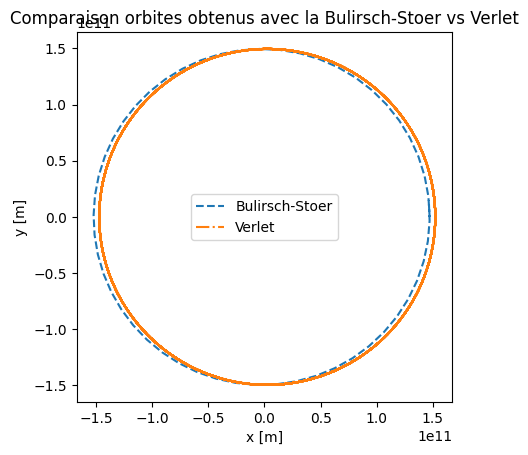

In [7]:
#d) Bulirsch-Stoer
def f(x, y):
    return(-G.value * M_sun.value * x/((x**2+y**2)**0.5)**3, -G.value * M_sun.value * y/((x**2+y**2)**0.5)**3)
    
def g(rx, ry):
    x = rx[0]
    vx = rx[1]
    y = ry[0]
    vy = ry[1]
    fx=vx
    fvx=f(x, y)[0]
    fy=vy
    fvy=f(x, y)[1]
    return np.array([fx, fvx, fy, fvy],float)

def Bulirsch(a, b, H, r_0, v_0, delta):
    tpoints = np.arange(a, b, H)
    x = []
    y = []
    rx = np.array([r_0, 0.0], float)
    ry = np.array([0, v_0], float)
    
    for t in tpoints:
        x.append(rx[0])
        y.append(ry[0])
        vx.append(rx[1])
        vy.append(ry[1])
        n = 1

        r1x = rx + 0.5*H*g(rx, ry)[0:2]
        r1y = ry + 0.5*H*g(rx, ry)[2:4]
        r2x = rx + H*g(r1x, r1y)[0:2]
        r2y = ry + H*g(r1x, r1y)[2:4]

        R1x = np.empty([1,2],float)
        R1x[0] = 0.5*(r1x+r2x+0.5*H*g(r2x, r2y)[0:2])




        R1y = np.empty([1,2],float)
        R1y[0] = 0.5*(r1y+r2y+0.5*H*g(r2x, r2y)[2:4])
    
        errorx = errory = 2*H*delta
        while errorx > H*delta and errory > H*delta:
            n += 1
            h = H/n
    
            r1x = rx + 0.5*h*g(rx, ry)[0:2]
            r1y = ry + 0.5*h*g(rx, ry)[2:4]
            r2x = rx + h*g(r1x, r1y)[0:2]
            r2y = ry + h*g(r1x,r1y)[2:4]
    
            for i in range(n-1):
                r1x += h*g(r2x, r2y)[0:2]
                r1y += h*g(r2x ,r2y)[2:4]
                r2x += h*g(r1x, r1y)[0:2]
                r2y += h*g(r1x ,r1y)[2:4]
    
            R2x = R1x
            R2y = R1y
    
            R1x = np.empty([n,2], float)
            R1x[0] = 0.5*(r1x+r2x+0.5*h*g(r2x, r2y)[0:2])
            R1y = np.empty([n,2], float)
            R1y[0] = 0.5*(r1y+r2y+0.5*h*g(r2x ,r2y)[2:4])
    
            for m in range (1, n):
                epsilonx = (R1x[m-1]-R2x[m-1])/((n/(n-1))**(2*m)-1)
                R1x[m] = R1x[m-1] + epsilonx
                epsilony = (R1y[m-1]-R2y[m-1])/((n/(n-1))**(2*m)-1)
                R1y[m] = R1y[m-1] + epsilony
            errorx = abs(epsilonx[0])
            errory = abs(epsilony[0])
    
        rx = R1x[n-1]
        ry = R1y[n-1]                    
    return(x,y,vx, vy, tpoints)
    
r_0 = 1.4710e11 # m
v_0 = 3.0287e4 #m/s
    
xBur, yBur,vxbur, vybur, tBur = Bulirsch(0, 32500000, 3600*24*7, r_0, v_0, 1000/(365*24*3600))

plt.title("Comparaison orbites obtenus avec la Bulirsch-Stoer vs Verlet")
plt.plot(xBur, yBur, label = "Bulirsch-Stoer", linestyle="dashed")
plt.plot(xverlet, yverlet, label="Verlet", linestyle="dashdot")
plt.gca().set_aspect("equal")
plt.ylabel("y [m]")
plt.xlabel("x [m]")
plt.legend()
plt.show()

e) Bulirsch-Stoer en 3D pour trouver l'orbite de mars 

position théorique = [2.35763766e+11] m
position calculé = 232784877894.36557 m
différence: 2 %


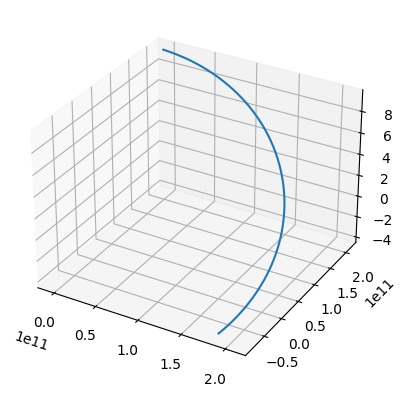

In [8]:
eph = Ephemeris(de421)

# dates,
lancement=Time("2020-07-30")
atterissage=Time("2021-02-18")

# un nombre de jours juliens est attendu par la routine, d’o`u le .jd,
# position en km, vitesse en km par jour,
position, velocity = eph.position_and_velocity('mars',lancement.jd)



r_0x = float(position[0]*1000)
v_0x = float(velocity[0]/86.4)

r_0y = float(position[1]*1000)
v_0y = float(velocity[1]/86.4)

r_0z = float(position[2]*1000)
v_0z = float(velocity[2]/86.4)

#modification de l'équation f(x) en 3D
def f(x, y, z):
    return(-G.value * M_sun.value * x/((x**2+y**2+z**2)**0.5)**3, -G.value * M_sun.value * y/((x**2+y**2+z**2)**0.5)**3, -G.value * M_sun.value * z/((x**2+y**2+z**2)**0.5)**3)


# Implémentation de la méthode de Bulirsch-Stoer en 3D  
def g(rx, ry, rz):
    x = rx[0]
    vx = rx[1]
    y = ry[0]
    vy = ry[1]
    z = rz[0]
    vz = rz[1]
    fx=vx
    fvx=f(x, y, z)[0]
    fy=vy
    fvy=f(x, y, z)[1]
    fz=vz
    fvz=f(x, y, z)[2]
    return np.array([fx, fvx, fy, fvy, fz, fvz],float)

def Bulirsch3D(a, b, H, r_0x, v_0x, r_0y, v_0y, r_0z, v_0z, delta):
    tpoints = np.arange(a, b, H)
    x = []
    y = []
    z = []
    vz = []
    rx = np.array([r_0x, v_0x], float)
    ry = np.array([r_0y, v_0y], float)
    rz = np.array([r_0z, v_0z], float) 
    
    for t in tpoints:
        x.append(rx[0])
        y.append(ry[0])
        z.append(rz[0])
        vx.append(rx[1])
        vy.append(ry[1])
        vz.append(rz[1])
        n = 1

        r1x = rx + 0.5*H*g(rx, ry, rz)[0:2]
        r1y = ry + 0.5*H*g(rx, ry, rz)[2:4]
        r1z = rz + 0.5*H*g(rx, ry, rz)[4:6]
        r2x = rx + H*g(r1x, r1y, r1z)[0:2]
        r2y = ry + H*g(r1x, r1y, r1z)[2:4]
        r2z = rz + H*g(r1x, r1y, r1z)[4:6]

        R1x = np.empty([1,2],float)
        R1x[0] = 0.5*(r1x+r2x+0.5*H*g(r2x, r2y, r2z)[0:2])




        R1y = np.empty([1,2],float)
        R1y[0] = 0.5*(r1y+r2y+0.5*H*g(r2x, r2y, r2z)[2:4])

        R1z = np.empty([1,2],float)
        R1z[0] = 0.5*(r1z+r2z+0.5*H*g(r2x, r2y, r2z)[2:4])
    
        errorx = errory = errorz = 2*H*delta
        while errorx > H*delta and errory > H*delta and errorz > H*delta:
            n += 1
            h = H/n
    
            r1x = rx + 0.5*h*g(rx, ry, rz)[0:2]
            r1y = ry + 0.5*h*g(rx, ry, rz)[2:4]
            r1z = rz + 0.5*h*g(rx, ry, rz)[4:6]
            r2x = rx + h*g(r1x,r1y,r1z)[0:2]
            r2y = ry + h*g(r1x,r1y,r1z)[2:4]
            r2z = rz + h*g(r1x,r1y,r1z)[4:6]
    
            for i in range(n-1):
                r1x += h*g(r2x, r2y, r2z)[0:2]
                r1y += h*g(r2x ,r2y, r2z)[2:4]
                r1z += h*g(r2x ,r2y, r2z)[4:6]
                r2x += h*g(r1x, r1y, r2z)[0:2]
                r2y += h*g(r1x ,r1y, r2z)[2:4]
                r2z += h*g(r1x ,r1y, r2z)[4:6]
    
            R2x = R1x
            R2y = R1y
            R2z = R1z
    
            R1x = np.empty([n,2], float)
            R1x[0] = 0.5*(r1x+r2x+0.5*h*g(r2x, r2y, r2z)[0:2])
            R1y = np.empty([n,2], float)
            R1y[0] = 0.5*(r1y+r2y+0.5*h*g(r2x ,r2y, r2z)[2:4])
            R1z = np.empty([n,2], float)
            R1z[0] = 0.5*(r1z+r2z+0.5*h*g(r2x ,r2y, r2z)[4:6])
    
            for m in range (1, n):
                epsilonx = (R1x[m-1]-R2x[m-1])/((n/(n-1))**(2*m)-1)
                R1x[m] = R1x[m-1] + epsilonx
                epsilony = (R1y[m-1]-R2y[m-1])/((n/(n-1))**(2*m)-1)
                R1y[m] = R1y[m-1] + epsilony
                epsilonz = (R1z[m-1]-R2z[m-1])/((n/(n-1))**(2*m)-1)
                R1z[m] = R1z[m-1] + epsilonz
            errorx = abs(epsilonx[0])
            errory = abs(epsilony[0])
            errorz = abs(epsilonz[0])
    
        rx = R1x[n-1]
        ry = R1y[n-1]     
        rz = R1z[n-1]                
    return(x,y,z,vx,vy,vz, tpoints)

xBur, yBur, zBur, vxbur, vybur, vzbur, tBur = Bulirsch3D(0, 203*24*60*60, 30000, r_0x, v_0x, r_0y, v_0y, r_0z, v_0z, 900/(365*24*3600))


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(xBur, yBur, zBur)

position_fin = eph.position('mars',atterissage.jd)
position_fin = (((position_fin[0]**2)+(position_fin[1]**2)+(position_fin[2]**2))**0.5)*1000
print(f"position théorique = {position_fin} m")
position_bulirsch = (xBur[-1]**2+yBur[-1]**2+zBur[-1]**2)**0.5
print(f"position calculé = {position_bulirsch} m")
print(f"différence: {100 - int(position_bulirsch/position_fin*100)} %")

f)Il est impossible d'être sûre que la NASA utilise cet outil pour les missions vers Mars, mais le General Mission Analysis Tool(GMAT), logiciel open source développé par la NASA, a certainement été utilisé pour d'autre type de missions assez similaires, et il utilise de base ces intégrateurs numériques: Runge-Kutta 89, Runge-Kutta 68, Runge-Kutta 56, Prince-Dormand 7-8, Prince-Dormand 4-5, Prince-Dormand 8-5-3 et Adams-Bashforth-Moulton.

g)La sonde Mars Climate Orbiter à été perdu car le système embarqué sur la sonde pour communiqué la poussée des propulseurs, fait par Lockheed, utilisait des livre-force par seconde, mais le logiciel de l'équipe de navigation sur Terre, qui prennait ces données pour faire les calculs de correction, utilisait les newtons-secondes. Donc, les corrections calculés étaient érronés, et la sonde est passé trop proche de mars, se détruisant dans son atmosphère.

Partie 3: L'équation de Schrödinger et la méthode spectrale

h)

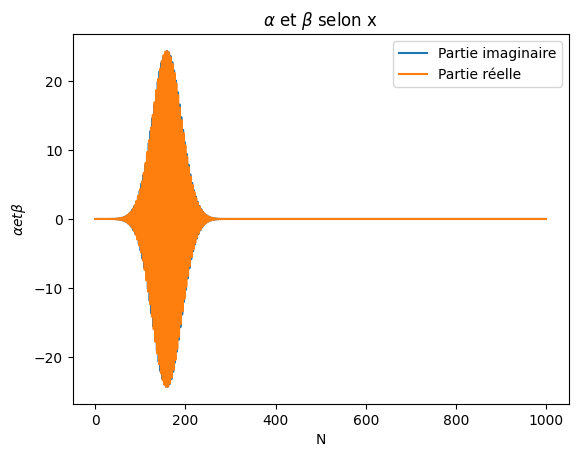

In [9]:
#1D DST Type-1 : discrete sinus Fourier transform 
def dst_rfft(y):    #Prends les valeurs réelles uniquement
    N = len(y)  
    y2 = empty(2*N, float)   
    y2[0]=y2[N] = 0.0    #Les extémités sont nulles
    y2[1:N] = y[1:]    
    y2[:N:-1] = -y[1:]     #organiser la symétrie de y2 basée sur y
    a = -imag(rfft(y2))[:N]
    return a

def normalize_psi(psi, x):
   int_psi_square = scipy.integrate.simps(abs(psi) ** 2, x)
   return psi/np.sqrt(int_psi_square)

#Constantes données
N = 1000
L = 10**(-8)
M = 9.109*10**(-31)
sig = 10**(-10)
kappa = 5*10**10

#Créer la matrice des valeurs de psi(x,0)
psi12 = np.zeros(N, dtype='complex_')

x = np.arange(0,N,1)


for i in x:
    psi12[i] = (np.exp(-((i*L/N - L/2)**2)/(2*sig**2)))*cmath.exp(1j*kappa*i*L/N)

R = dst_rfft(psi12.real)
I = dst_rfft(psi12.imag)
R = np.expand_dims(R, axis=1)
I = np.expand_dims(I, axis=1)



plt.plot(x, I, label='Partie imaginaire')
plt.plot(x, R, label='Partie réelle')
plt.legend()
plt.xlabel('N')
plt.ylabel(r'$\alpha et \beta$')
plt.title(r'$\alpha$ et $\beta$ selon x')
plt.show()
x = (1e-8/N)*x

i) La documentation de numpy.fft.rfft infique
''When the DFT is computed for purely real input, the output is Hermitian-symmetric, i.e. the negative frequency terms are just the complex conjugates of the corresponding positive-frequency terms, and the negative-frequency terms are therefore redundant. This function does not compute the negative frequency terms, and the length of the transformed axis of the output is therefore n//2 + 1.'' (https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html)

Newman indique  que ''a discrete cosine transform is nothing more than an ordinary discrete Fourier transform performed on a set of samples that are symmetric around the middle of the transform interval.'' (p.318). 

La fonction donnée à la transformée de Fourier rapide de valeurs réelles contient des valeurs imaginaires. Par contre, comme cette fonction est un sinus, elle présente une symétrie, qu'on peut centrer autour du centre de l'interval de la transformée de Fourier. Les valeurs réelles peuvent présenter à elles seules la fonction. 
 

j) 


In [10]:
def idst(a):
    N = len(a)
    c = empty(N+1, dtype='complex_')
    c[0] = c[N] = 0.0
    c[1:N] = -1j*a[1:]
    y = irfft(c)[:N]
    y[0] = 0.0
    return y

def fxn_onde(R, I, t):
    crochet = np.zeros(N)
    cte = (pi**2)*hbar*t/(2*M*L**2)

    for K in range(1,N-1):
        crochet[K] = R[K]*np.cos(cte*K**2)-I[K]*np.sin(cte*K**2)

    coef = idst(crochet)
    repsi = np.zeros((N))
    for k in range(1, N-1):
        repsi[k] = ((coef[k])*np.sin(pi*k/N)/N)
    repsi_norm = normalize_psi(repsi, x)
    return repsi_norm

repsi_norm = fxn_onde(R, I, 1e-16)


plt.plot(x, repsi_norm)
plt.title('La fonction d\'onde pour t=$10^{-16}$ s')
plt.xlabel('x [m]')
plt.ylabel(r'Re$\psi (x_n,t)$ normalisée')
plt.show()


AttributeError: module 'scipy' has no attribute 'integrate'

k) L'image produite devrait être centrée sur x = 500. 

In [ ]:
temps = [i*1e-18 for i in range(1000)]

t_list =  []
x_list = []
value_list = []

for t in temps:
    t_list.append([t]*N)
    x_list.append(x)
    valeurs = fxn_onde(R, I, t)
    value_list.append(valeurs)



In [ ]:
vl = []
for i in value_list:
    for j in i:
        vl.append(j)
xl = []
for i in x_list:
    for j in i:
        xl.append(j)
  
dict = {'Time':sum(t_list, []), 'x':xl, 'value':vl}
df = pd.DataFrame(dict)

plotly.offline.init_notebook_mode(connected=True)
fig = px.line(df, x='x', y='value', animation_frame='Time', range_y=[min(vl), max(vl)])
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 500
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 500
fig.show()

l) Avec le temps, la fonction d'onde conserve sa forme générale où $\psi$ diminue jusqu'à devenir nul aux bornes de la boîte. La fonction conserve une forme plutôt sinusoïdale, dans laquelle différentes formes plus complexes sont présentes. Ceci est dû au fait que l'électron ne peut être présent aux bornes de la boîte, et donc que sa probabilité de présence est habituellement plus élevée vers le centre de la boîte.
